Rasterio - wczytywanie danych

In [3]:
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.transform import Affine
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
from matplotlib import pyplot as plt
#import earthpy

image = rasterio.open('.\pliki\szmaragdowe_geotif.tif')

In [4]:
image.name

'.\\pliki\\szmaragdowe_geotif.tif'

In [5]:
image.mode

'r'

In [6]:
image.count

1

In [7]:
print('szerokość:',image.width) #piksele
print('wysokosc:',image.height) #piksele

szerokość: 428
wysokosc: 482


In [8]:
pixelSizeX, pixelSizeY  = image.res #pobranie rozdzielczosci optycznej rastra
print(pixelSizeX, pixelSizeY)

1.0 1.0


In [9]:
{i: dtype for i, dtype in zip(image.indexes, image.dtypes)} #typ danych

{1: 'float32'}

In [10]:
bounds=image.bounds #zakres przestrzenny danych
print(bounds)

BoundingBox(left=208859.5, bottom=620466.5, right=209287.5, top=620948.5)


In [13]:
image.transform * (0, 0) #przesunięcie rastra metodą affinicznę

(208859.5, 620948.5)

Przekształcenie afiniczne jest metodą odwzorowania liniowego, która zachowuje punkty, proste i płaszczyzny. Zestawy prostych równoległych pozostają równoległe po przekształceniu afinicznym.

In [14]:
image.transform * (image.width, image.height) #pozycja lewego dolnego narożnika w przestrzeni geograficznej

(209287.5, 620466.5)

In [15]:
bounds[0],bounds[1],bounds[2], bounds[3]

(208859.5, 620466.5, 209287.5, 620948.5)

In [22]:
image.bounds

BoundingBox(left=208859.5, bottom=620466.5, right=209287.5, top=620948.5)

In [23]:
image.bounds.left, image.bounds.top 

(208859.5, 620948.5)

In [24]:
image.crs #układ współrzędnych obrazu

CRS.from_epsg(2180)

In [25]:
image.indexes #ilość kanałów

(1,)

In [26]:
print(image.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 428, 'height': 482, 'count': 1, 'crs': CRS.from_epsg(2180), 'transform': Affine(1.0, 0.0, 208859.5,
       0.0, -1.0, 620948.5), 'tiled': False, 'interleave': 'band'}


In [27]:
band1 = image.read(1) #wczytanie kanału pierwszego

In [28]:
x, y = (image.bounds.left + 100, image.bounds.top - 200) #oddalnoego w metrach od określonego miejsca tablicy
row, col = image.index(x,y) #index przestrzenny
row, col

(200, 100)

In [29]:
band1[row, col] #wartoś piksela

84.11

In [30]:
band1[200][100] #wartość piksela

84.11

In [31]:
image.xy(image.height // 2, image.width // 2) #środek obrazu

(209074.0, 620707.0)

# NUMPY i RASTERIO

Tworzenie rastra z losowych danych

In [33]:
import rasterio
from rasterio.transform import from_origin
crs=image.crs
arr = np.random.randint(5, size=(200,200)).astype(np.float64)

transform = from_origin(bounds[0], bounds[1], 0.5, 0.5)

image = rasterio.open('xxx.tif', 'w', driver='GTiff',
                            height = arr.shape[0], width = arr.shape[1],
                            count=1, dtype=str('float64'),
                            crs=crs,
                            transform=transform)

image.write(arr, 1)
image.close()

In [34]:
print(arr[50][6])

2.0


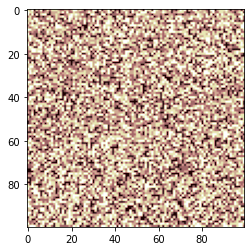

In [36]:
with rasterio.open(f'xxx.tif') as src:
    arr = src.read(out_shape=(src.height//2, src.width//2))
%matplotlib inline

plt.imshow(arr[0],cmap='pink')
plt.show()

Operacje na rastrach

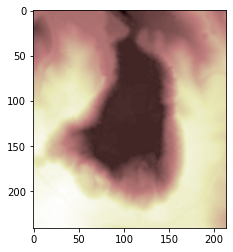

In [38]:
with rasterio.open(f'.\pliki\szmaragdowe_geotif.tif') as src:
    arr = src.read(out_shape=(src.height//2, src.width//2))

%matplotlib inline

plt.imshow(arr[0],cmap='pink')
plt.show()

In [39]:
print(arr.shape) #numpy shape band,row,column

(1, 241, 214)


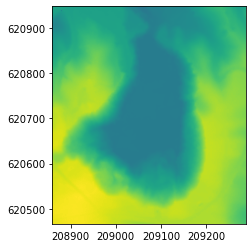

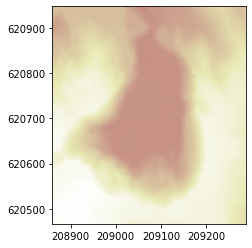

<AxesSubplot:>

In [41]:
src = rasterio.open(".\pliki\szmaragdowe_geotif.tif")
show(src,cmap='viridis')
show(src.read(), transform=src.transform,cmap='pink')

# Zmiana wartości NUMPY

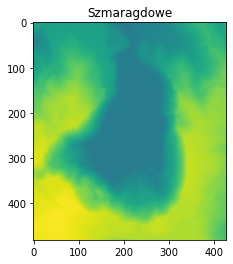

In [43]:
image = rasterio.open(".\pliki\szmaragdowe_geotif.tif")
raster = image.read(1)
plt.imshow(raster)
plt.title("Szmaragdowe")
plt.show()

In [47]:
with rasterio.open('.\pliki\szmaragdowe_geotif.tif', 'r+') as ds:
    arr = ds.read()  # czytamy wszystkie dane
    arr[0, 10, 20] = 7  # zmiana wartości piksela band 1, row 10, column 20
    ds.write(arr)

In [48]:
print(arr[0,10, 20])#wartość piksela

7.0


In [49]:
raster[10, 20] = 7
raster[10, 20]

7.0

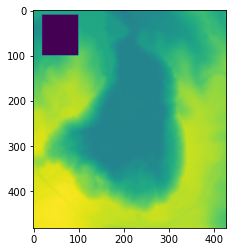

<AxesSubplot:>

In [50]:
raster[10:100, 20:100] = 0
show(raster)

# generowanie izolinii wysokości

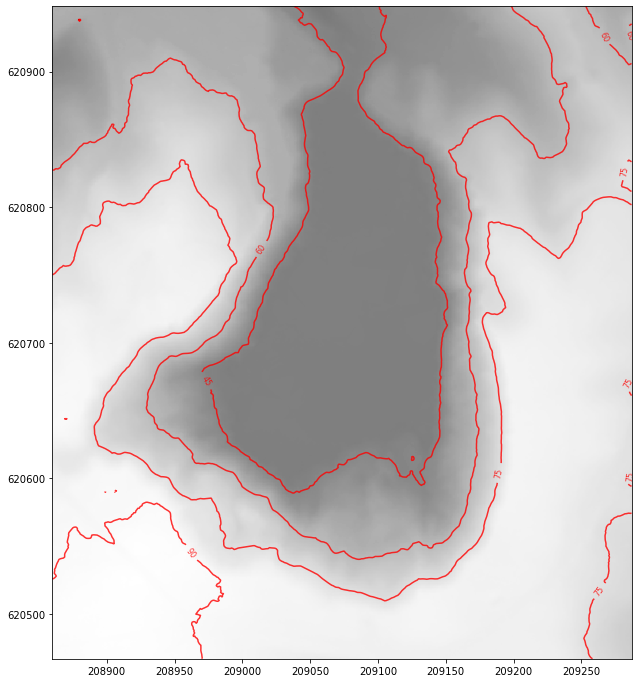

In [52]:
image = rasterio.open(".\pliki\szmaragdowe_geotif.tif")
fig, ax = plt.subplots(1, figsize=(12, 12))
show((src, 1), cmap='Greys_r', interpolation='nearest', ax=ax)
show((src, 1), contour=True, ax=ax)
plt.show()

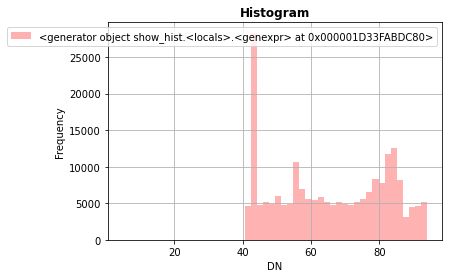

In [53]:
show_hist(
     src, bins=50, lw=0.0, stacked=False, alpha=0.3,
     histtype='stepfilled', title="Histogram")

# Interploacja danych

wypełnianie pustych miejsc

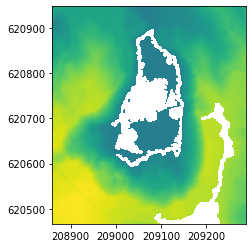

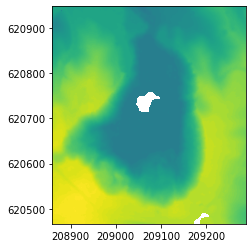

<AxesSubplot:>

In [54]:
import rasterio
from rasterio.fill import fillnodata #wypełnianie zeros macierzy

image = r".\pliki\szmaragdowe_geotif_nodata.tif"
input = rasterio.open(image)
with rasterio.open(image) as src:
    profile = src.profile
    arr = src.read(1)
    arr_filled = fillnodata(arr, mask=src.read_masks(1), max_search_distance=15, smoothing_iterations=0)

new_image = r"xxx.tif"   
with rasterio.open(new_image, 'w', **profile) as dest:
    dest.write_band(1, arr_filled)
show(input)
out = rasterio.open(new_image)
show(out)

# Resampling - zmiana rozdzielczości

Shape przed resamplingiem: (482, 428)
Shape po resamplingu: (1446, 1284)
Transform przed resamplingiem:
 | 1.00, 0.00, 208859.50|
| 0.00,-1.00, 620948.50|
| 0.00, 0.00, 1.00| 

Transform po resamplingu:
 | 0.33, 0.00, 208859.50|
| 0.00,-0.33, 620948.50|
| 0.00, 0.00, 1.00|


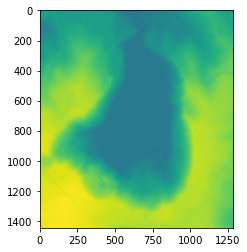

<AxesSubplot:>

In [56]:
import rasterio
from rasterio.enums import Resampling

image = r".\pliki\szmaragdowe_geotif.tif"
scale_factor = 3

with rasterio.open(image) as dataset:
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * scale_factor),
            int(dataset.width * scale_factor)
        ),
        resampling=Resampling.bilinear
    )

    print('Shape przed resamplingiem:', dataset.shape)
    print('Shape po resamplingu:', data.shape[1:])

    # transformacja
    dst_transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

    print('Transform przed resamplingiem:\n', dataset.transform, '\n')
    print('Transform po resamplingu:\n', dst_transform)
show(data)

In [57]:
pixelSizeX, pixelSizeY  = dataset.res #pobranie rozdzielczosci optycznej rastra
print(pixelSizeX, pixelSizeY)

1.0 1.0


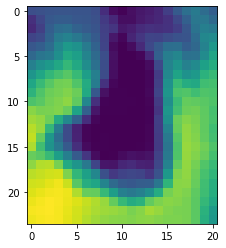

<AxesSubplot:>

In [58]:
import rasterio
from rasterio.enums import Resampling

scale_factor = 1/20

with rasterio.open(image) as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * scale_factor),
            int(dataset.width * scale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

show(data) 

# Zapisywanie NUMPY array do rastra z georeferncją - kroki

In [60]:
srr = rasterio.open('.\pliki\szmaragdowe_geotif.tif') #oryginał
bounds[0],bounds[1],bounds[2], bounds[3]

(208859.5, 620466.5, 209287.5, 620948.5)

In [61]:
pixelSizeX, pixelSizeY  = srr.res #pobranie rozdzielczosci optycznej rastra
print(pixelSizeX, pixelSizeY)

1.0 1.0


In [62]:
from rasterio.transform import from_origin
bounds=srr.bounds
(bounds[0],bounds[3],pixelSizeX, pixelSizeY)

(208859.5, 620948.5, 1.0, 1.0)

In [63]:
transform=from_origin(bounds[0],bounds[3],pixelSizeX, pixelSizeY)
transform

Affine(1.0, 0.0, 208859.5,
       0.0, -1.0, 620948.5)

In [64]:
#obraz do zapisania
arr=data
dim=arr.shape
dim

(1, 24, 21)

In [65]:
#obliczenie rozdziaelczości
transform=from_origin(bounds[0],bounds[3],pixelSizeX, pixelSizeY)
pix_height=(bounds[2]-bounds[0])/dim[2]
pix_width=(bounds[1]-bounds[3])/dim[1]
print(pix_height,pix_width)

20.38095238095238 -20.083333333333332


In [67]:
# Zapisywanie danych do pliku
array=arr


image= r".\pliki\szmaragdowe_geotif.tif"

'''
with rasterio.open(image) as src:
    profile = src.profile
    arr = src.read(1)
    arr_filled = fillnodata(arr, mask=src.read_masks(1), max_search_distance=15, smoothing_iterations=0)
''' 
src = rasterio.open(image)
crs = src.crs

with rasterio.Env():

    profile = src.profile #źróło parametrów plik w src UWAGA!!! nieprawiłowa wielkość piksela
    profile2={'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': dim[2], 'height': dim[1], 'count': 1, 
              'crs': crs, 'transform': Affine(pix_height, 0.0, bounds[0],
       0.0, pix_width, bounds[3]), 'tiled': False, 'interleave': 'band', 'compress': 'lzw'}
    #profile2 podanie danych obrazu ręcznie 
    
    profile.update(
        dtype=rasterio.float32,
        count=1,
        compress='lzw')

    with rasterio.open('xxx2.tif', 'w', **profile2) as dst:
        dst.write(array.astype(rasterio.float32)) #uwaga jeśli wczytujemy metodą with open powinno wyglądać:
                                                  #st.write(array.astype(rasterio.uint8),1)



In [69]:
profile


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 428, 'height': 482, 'count': 1, 'crs': CRS.from_epsg(2180), 'transform': Affine(1.0, 0.0, 208859.5,
       0.0, -1.0, 620948.5), 'tiled': False, 'interleave': 'band', 'compress': 'lzw'}

In [70]:
src = rasterio.open(image)
pixelSizeX, pixelSizeY  = src.res #pobranie rozdzielczosci optycznej rastra
print(pixelSizeX, pixelSizeY)

1.0 1.0


# Zmiana układu współrzędnych wraz z interpolacją

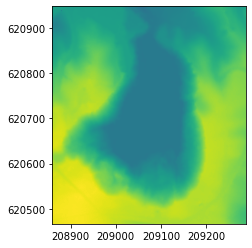

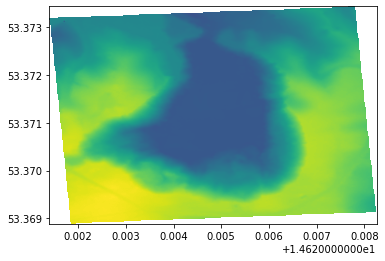

<AxesSubplot:>

In [72]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'
image = r".\pliki\szmaragdowe_geotif.tif"
out='xxx.tif'

with rasterio.open(image) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(out, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.cubic)
show(rasterio.open(image))
show(rasterio.open(out))            

Resampling do nowego większego obrazu

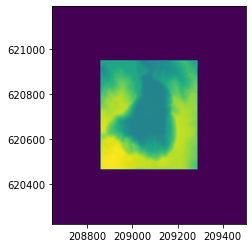

<AxesSubplot:>

In [73]:
import numpy as np
import rasterio
from rasterio import Affine as A
from rasterio.warp import reproject, Resampling

image = r".\pliki\szmaragdowe_geotif.tif"
scale_factor = 2
out='xxx.tif'

with rasterio.open(image) as src:
    src_transform = src.transform

    dst_transform = src_transform*A.translation(
        -src.width/scale_factor, -src.height/scale_factor)*A.scale(scale_factor)

    data = src.read()

    kwargs = src.meta
    kwargs['transform'] = dst_transform

    with rasterio.open(out, 'w', **kwargs) as dst:
        for i, band in enumerate(data, 1):
            dest = np.zeros_like(band) #puste piksele

            reproject(
                band,
                dest,
                src_transform=src_transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=src.crs,
                resampling=Resampling.nearest)

            dst.write(dest, indexes=i)
show(rasterio.open(out))            

#  Wizualizacja

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio


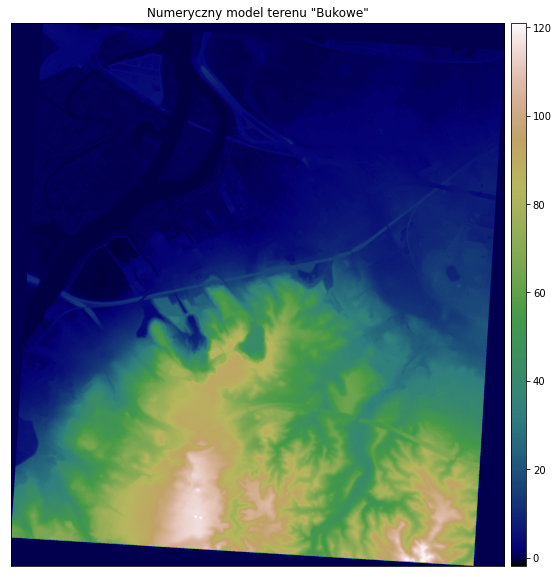

In [7]:
dtm = r".\pliki\bukowe.tif"
with rio.open(dtm) as src:
    elevation = src.read(1)
    elevation[elevation <= -9999] = np.nan #numpy no data ustawione na mniejsze niż zero

ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="Numeryczny model terenu \"Bukowe\"",
    figsize=(20, 10),
)
plt.show()

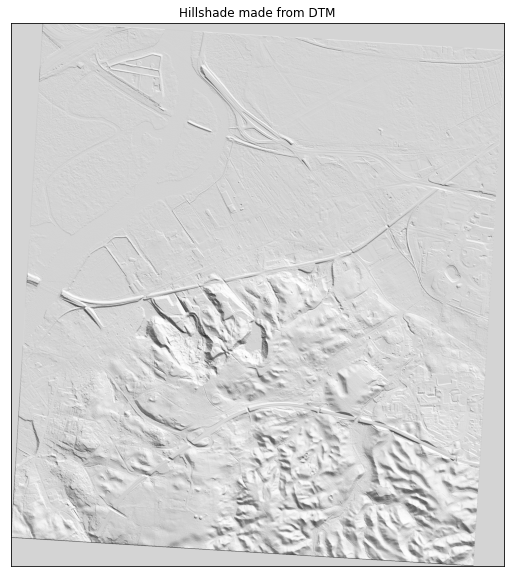

In [8]:
# Cieniowanie
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(20, 10),
)
plt.show()

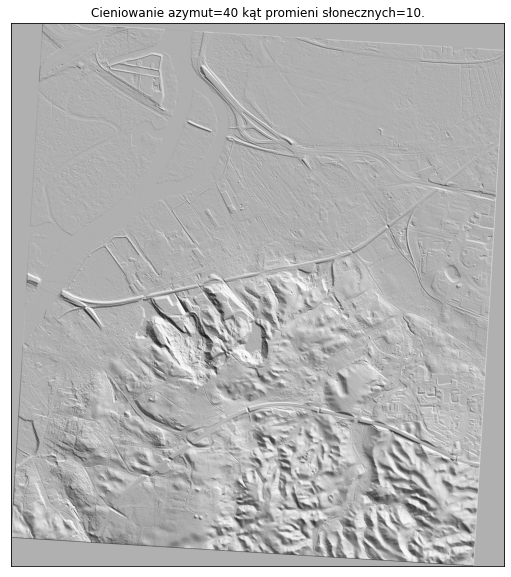

In [9]:
# Cieniowanie z wykorzystaniem kąta padania promieni słonecznych
azimuth=40
altitude=10
hillshade_azimuth = es.hillshade(elevation, azimuth=azimuth,altitude=altitude)

# Plot the hillshade layer with the modified azimuth
ep.plot_bands(
    hillshade_azimuth, #dodana funkcja cieniowania pod kątem
    cbar=False,
    title="Cieniowanie azymut="+str(azimuth)+" kąt promieni słonecznych="+str(altitude)+".",
    figsize=(20, 10),
)
plt.show()

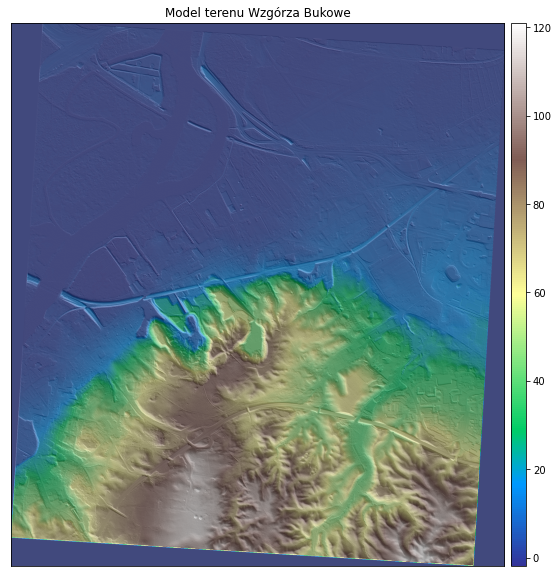

In [10]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5
fig, ax = plt.subplots(figsize=(20, 10))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Model terenu Wzgórza Bukowe",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5) #przeźroczystość
plt.show()